# Multiple Linear Regression

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['figure.figsize'] = (5, 5)

---
## Sci-kit learn data sets.

## <font color=blue>Learning Objectives:</font>
1. You will be able to load any of the data sets in sci-kit learn.

In [3]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape, diabetes.feature_names

((442, 10),
 (442,),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [6]:
features = "age sex bmi map tc ldl hdl tch ltg glu".split()
features

['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

---
## View the diabetes data set with Pandas.

## <font color=blue>Learning Objectives:</font>
1. Recall how to view tabular data with Pandas.

In [7]:
import pandas as pd

df1 = pd.DataFrame(X, columns=features)
df1['dis'] = y

df1

age       sex       bmi       map        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu    dis  
0   -0.002592  0.019908 -0.017646  151.0  
1   -0.039493 -0.068330 -0.092204   75.0  
2   -0.002592  0.002864 -0.025930  141.0  
3    0.034309  0.022692 -0.009362  206.0  
4   -0.002592 -0.031991 -0.046641  135.0  
..        ...       ...       ...    ...  
437 -0.002592  0.031193  0.007207  178.0  
438  0.034309 -0.018118  0.044485  104.0  
439 -0.011080 -0.046879  0.015491  132.0  
440  0.026560  0.044528 -0.025930  220.0  
441 -0.039493 -0.004220  0.003064   57.0  

[442 rows x 11 columns]

---
## Load non-scaled diabetes data from CSV file with Pandas.

## <font color=blue>Learning Objectives:</font>
1. Recall how to load CSV/Excel data files with Pandas.

In [8]:
# diabetes data set available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df2 = pd.read_csv('diabetes.csv')
df2.columns = features + ['dis']

df2

age  sex   bmi     map   tc    ldl   hdl   tch     ltg  glu  dis
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

## <font color=blue>Learning Objectives:</font>
1. Recall how to work with specified columns and locations in a Pandas Dataframe.

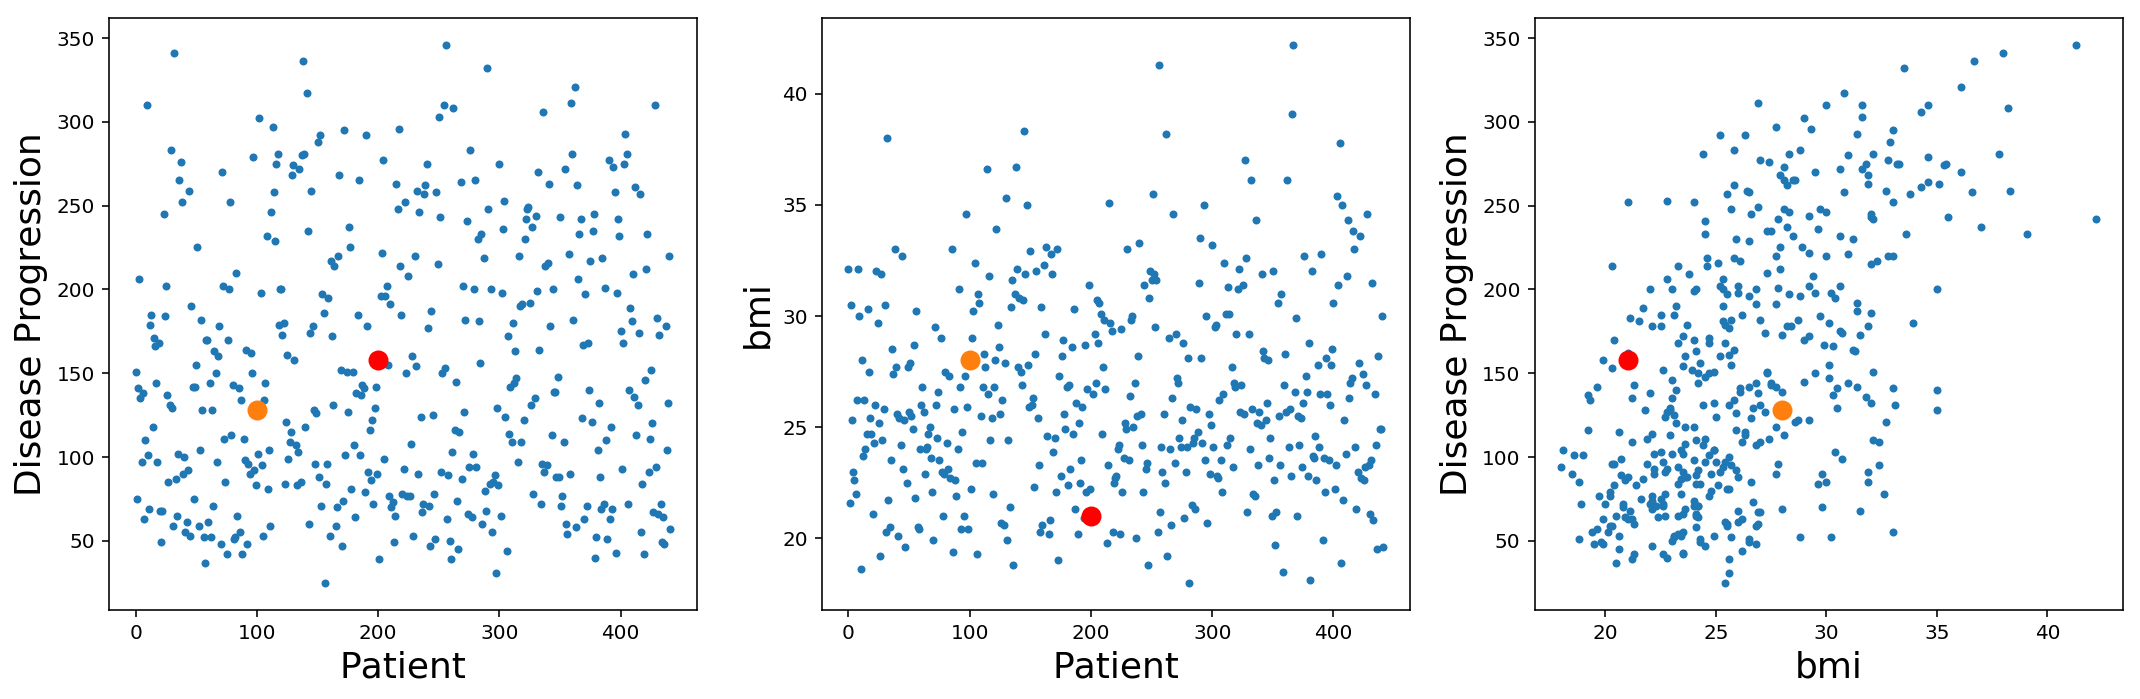

In [107]:
plt.figure(figsize=(15,5))
patientA = 100
patientB = 200
feature = 'bmi'

plt.subplot(131)
plt.plot(range(442), df2['dis'], '.')
plt.plot(patientA, df2.loc[patientA,'dis'], 'o', markersize=9)
plt.plot(patientB, df2.loc[patientB,'dis'], 'ro', markersize=9)
plt.xlabel('Patient')
plt.ylabel('Disease Progression')

plt.subplot(132)
plt.plot(range(442), df2[feature], '.')
plt.plot(patientA, df2.loc[patientA,feature], 'o', markersize=9)
plt.plot(patientB, df2.loc[patientB,feature], 'ro', markersize=9)
plt.xlabel('Patient')
plt.ylabel(feature)

plt.subplot(133)
plt.plot(df2[feature], df2['dis'], '.')
plt.plot(df2.loc[patientA,feature], df2.loc[patientA,'dis'], 'o', markersize=9)
plt.plot(df2.loc[patientB,feature], df2.loc[patientB,'dis'], 'ro', markersize=9)
plt.xlabel(feature)
plt.ylabel('Disease Progression')

plt.tight_layout();

## <font color=red>Exercises</font>

1. Plot patients age vs. their bmi.

In [ ]:
plt.plot(...)
plt.xlabel('age')
plt.ylablel('bmi');

---
## Visualizing a data set for linear regression of multiple features

## <font color=blue>Learning Objectives:</font>
1. Use Seaborn to auto-generate a matrix of plots for visualizing correlations between features.

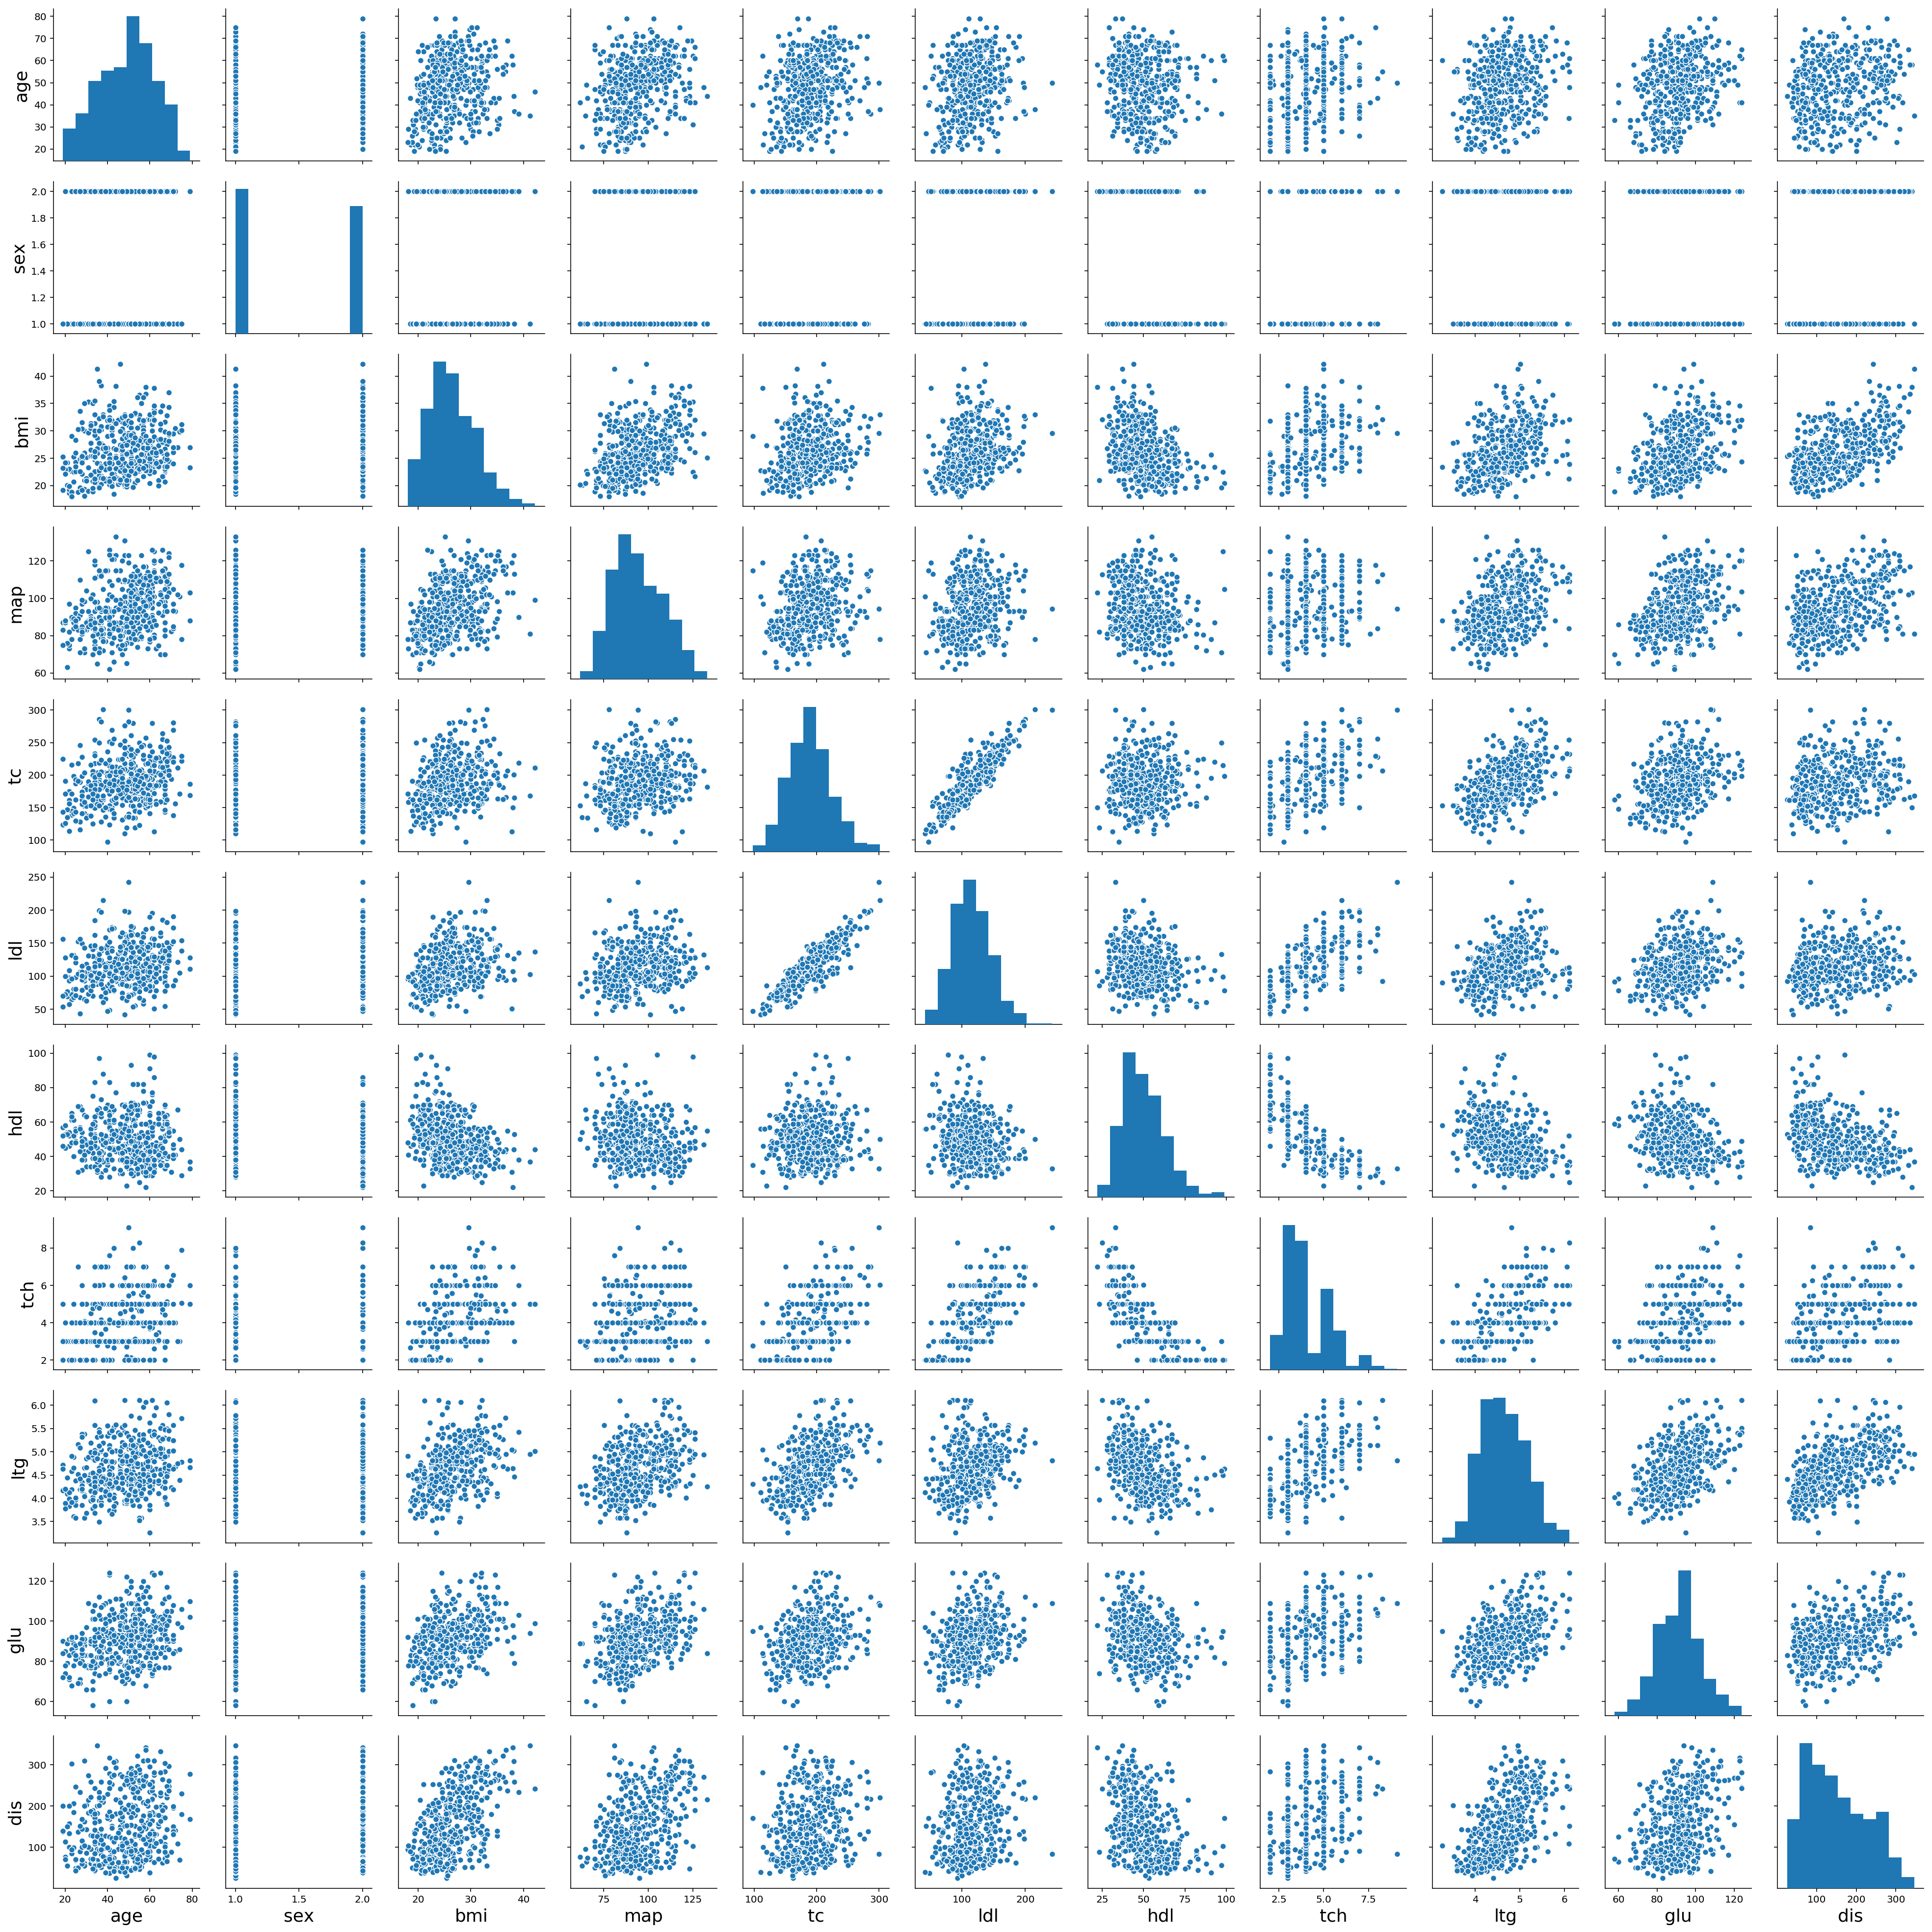

In [11]:
import seaborn as sns

sns.pairplot(df2);

---
## Ordinary Least Squares Multiple Linear Regression

## $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_N x_N$

## $dis = \beta_0 + \beta_1 age + \beta_2 sex + ... + \beta_{10} glu$

## <font color=blue>Learning Objectives:</font>
1. You will be able to perform OLS linear regression for target data (y) dependent on multiple features (x1, x2, ... --> columns of X)
2. You will appreciate that the model fit is multi-dimensional, although a 3-D plot is the limit for simple graphical representation.

In [145]:
# get data from df2 as numpy arrays
X = df2.loc[:,'age':'glu'].to_numpy()
y = df2['dis'].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [150]:
from sklearn.linear_model import LinearRegression

olsmodel = LinearRegression(fit_intercept=True)
olsmodel.fit(X, y)

print(olsmodel.intercept_)  # y-intercept
print(olsmodel.coef_)  # slope

df2_beta = olsmodel.coef_

-334.56713851878567
[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]


In [151]:
feature = 'bmi'
col = features.index(feature)
beta = df2_beta[col]

col, beta, features

(2,
 5.602962091923716,
 ['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])

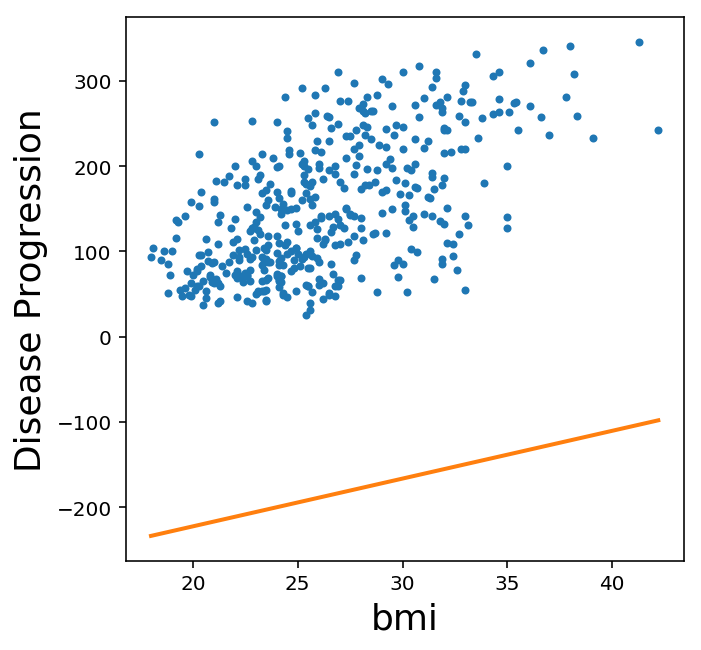

In [152]:
plt.plot(df2[feature], df2['dis'], '.')
plt.xlabel(feature)
plt.ylabel('Disease Progression')

xfit = np.linspace(df2[feature].min(), df2[feature].max(), 100)
yfit = olsmodel.intercept_ + beta * xfit
plt.plot(xfit, yfit, lw=2);

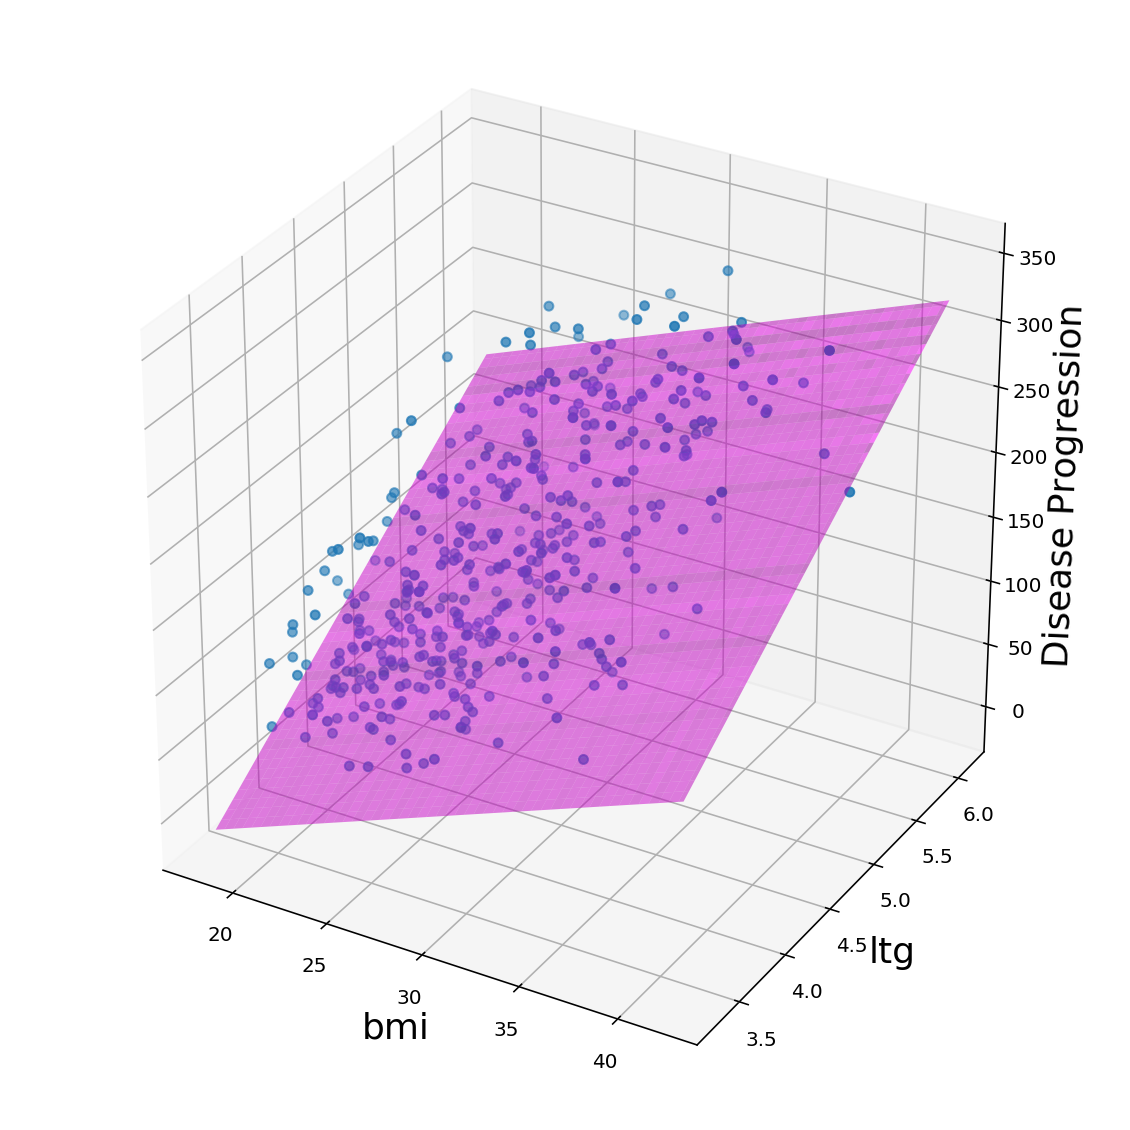

In [153]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(df2['bmi'], df2['ltg'], df2['dis'])
ax.set_xlabel('bmi')
ax.set_ylabel('ltg')
ax.set_zlabel('Disease Progression')

bmirange = np.linspace(df2['bmi'].min(), df2['bmi'].max(), 100)
ltgrange = np.linspace(df2['ltg'].min(), df2['ltg'].max(), 100)
xx, yy = np.meshgrid(bmirange, ltgrange)
zz = olsmodel.intercept_ + xx * df2_beta[2] + yy * df2_beta[8]
ax.plot_surface(xx, yy, zz, alpha=0.5, color='magenta');

plt.tight_layout();

---
## The model can be summarized by the coefficients for each feature (plus a y-intercept).

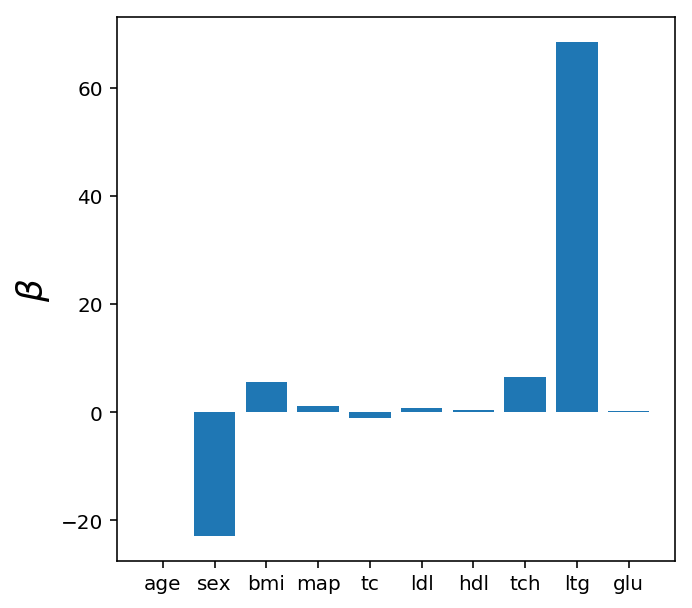

In [154]:
n = len(df2_beta)

plt.bar(range(n), df2_beta)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$');  # <== r'...'

---
## Using the model to predict disease progression in a new patient

## <font color=blue>Learning Objectives:</font>
1. You will be able to use your model fit to predict the target value from new feature data.

In [125]:
age = 50
sex = 1
bmi = 35
map_ = 125
tc = 150
ldl = 100
hdl = 55
tch = 6.5
ltg = 5
glu = 120

newPatient = np.array([age, sex, bmi, map_, tc, ldl, hdl, tch, ltg, glu]).reshape((1,-1))
newPatient

array([[ 50. ,   1. ,  35. , 125. , 150. , 100. ,  55. ,   6.5,   5. ,
        120. ]])

In [126]:
diseasePrediction = olsmodel.predict(newPatient)
diseasePrediction

array([326.56525046])

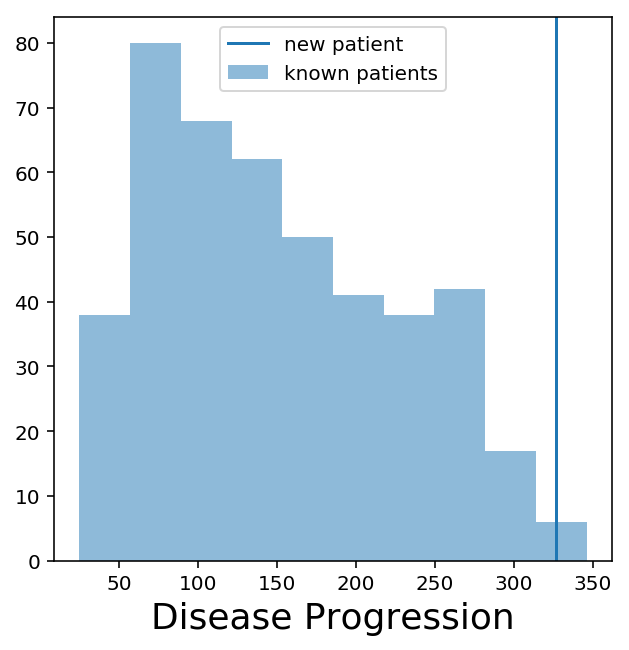

In [127]:
plt.hist(df2['dis'], alpha=0.5, label='known patients')
plt.axvline(diseasePrediction, label='new patient')
plt.xlabel('Disease Progression')
plt.legend();

## <font color=red>Exercises</font>

1. For the new patient above, change their bmi to 20 and ltg to 4 and redo the prediction for their disease progression.
2. Update the plot above for the new prediction.

---
## Data pre-processing (standardization)

## <font color=blue>Learning Objectives:</font>
1. You will be able to standardize feature data with different units/scales for multiple linear regression.

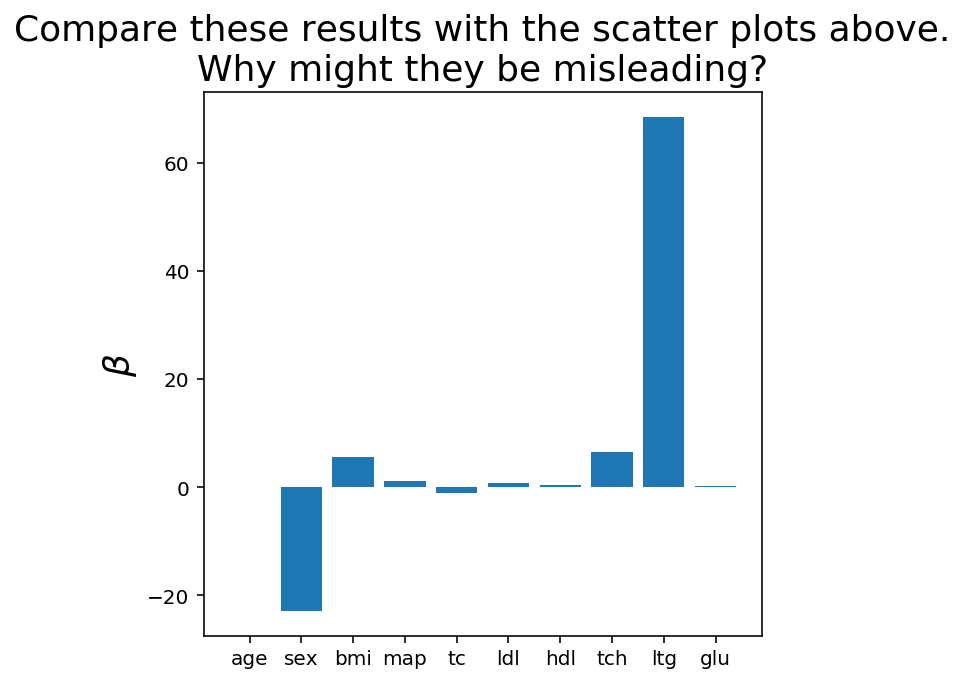

In [155]:
n = len(df2_beta)
plt.bar(range(n), df2_beta)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$');
plt.title('Compare these results with the scatter plots above.\nWhy might they be misleading?');

In [135]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### Standardization typicaly involves Centering and Normalizing Variance

In [136]:
age = df2['age'].to_numpy()

# subtract the mean
age = age - age.mean()

# normalize the variance
nsamples = len(age)
age = age / age.std()

age.var()

0.9999999999999999

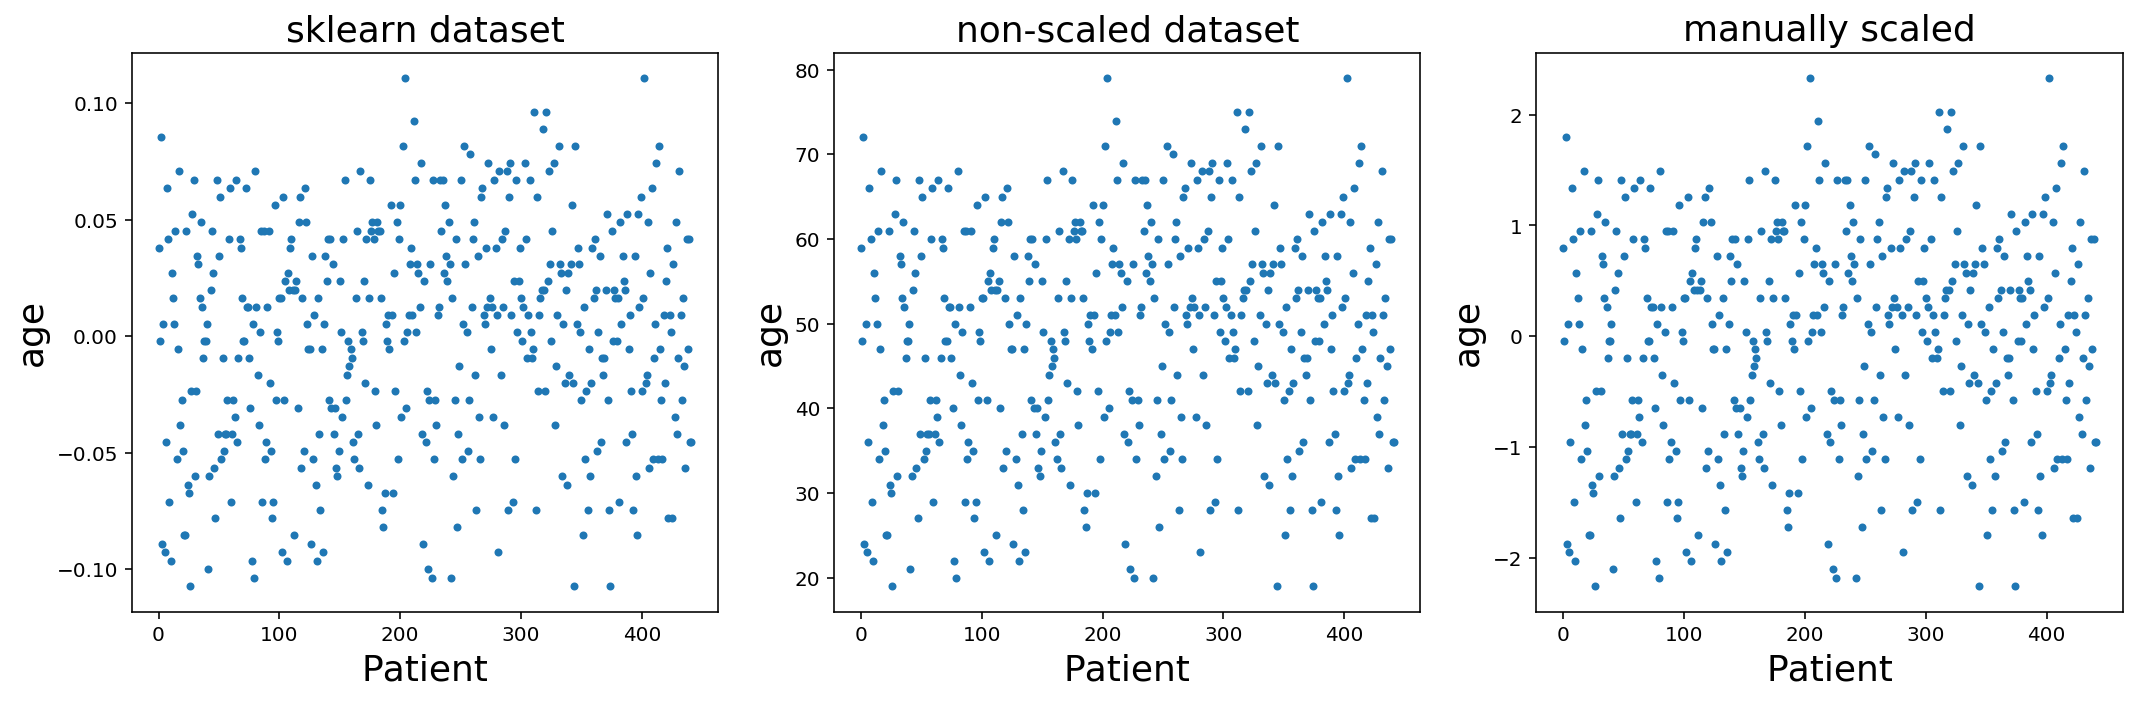

In [137]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(df1['age'], '.')
plt.xlabel('Patient')
plt.ylabel('age')
plt.title('sklearn dataset')

plt.subplot(132)
plt.plot(df2['age'], '.')
plt.xlabel('Patient')
plt.ylabel('age')
plt.title('non-scaled dataset')

plt.subplot(133)
plt.plot(age, '.')
plt.xlabel('Patient')
plt.ylabel('age')
plt.title('manually scaled')

plt.tight_layout();

---
## Let's refit the standardized data

### !!! Note, we do NOT need a y-intercept if both features and target data have been centered.

## <font color=blue>Learning Objectives:</font>
1. You will appreciate that standardizing features with unrelated units/scales helps to visually interpret their impact on the model prediction.

In [156]:
# get data from df2 as numpy arrays
X = df2.loc[:,'age':'glu'].to_numpy()
y = df2['dis'].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [157]:
# standardize both features and target data
X = X - X.mean(axis=0)
y = y - y.mean()

X = X / X.std(axis=0)
y = y / y.std()

X.shape, y.shape

((442, 10), (442,))

In [158]:
olsmodel = LinearRegression(fit_intercept=False)
olsmodel.fit(X, y);

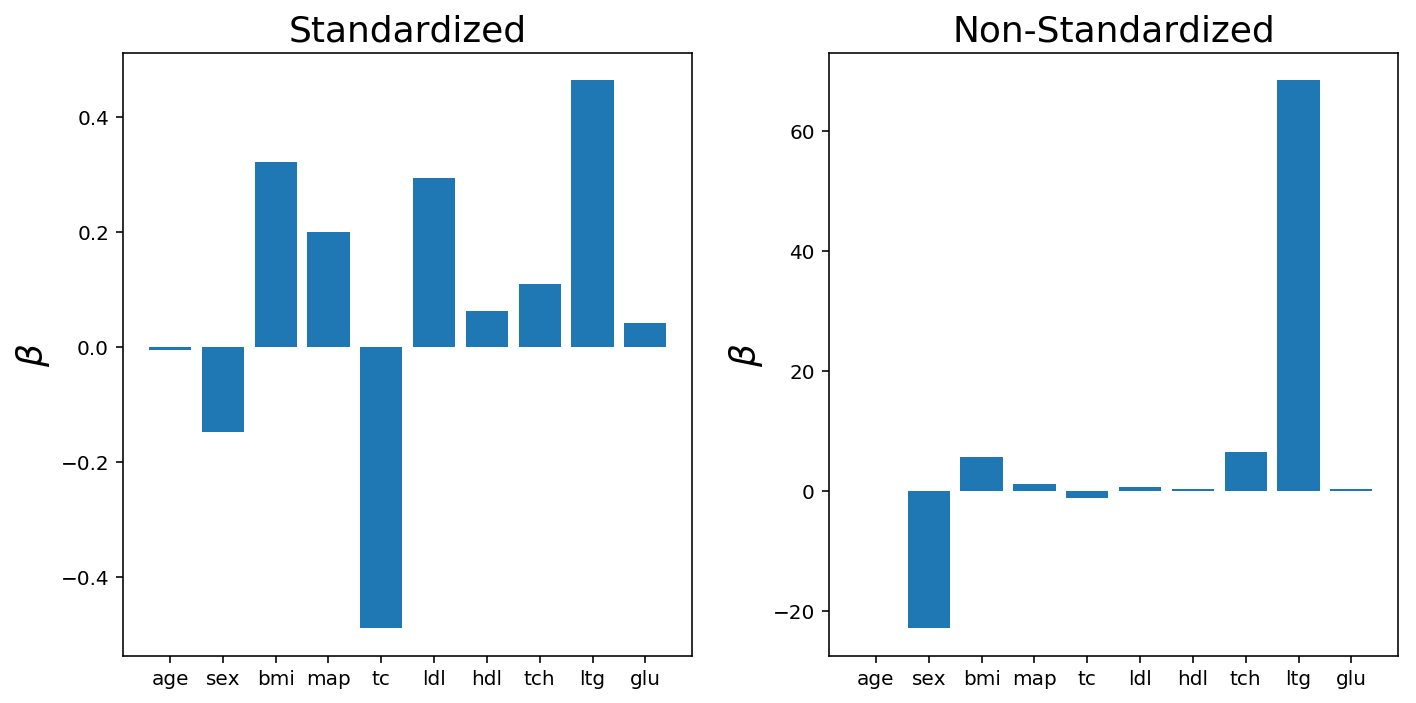

In [161]:
plt.figure(figsize=(10,5))

plt.subplot(121)
n = len(olsmodel.coef_)
plt.bar(range(n), olsmodel.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$')
plt.title('Standardized')

plt.subplot(122)
n = len(df2_beta)
plt.bar(range(n), df2_beta)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$')
plt.title('Non-Standardized')

plt.tight_layout();

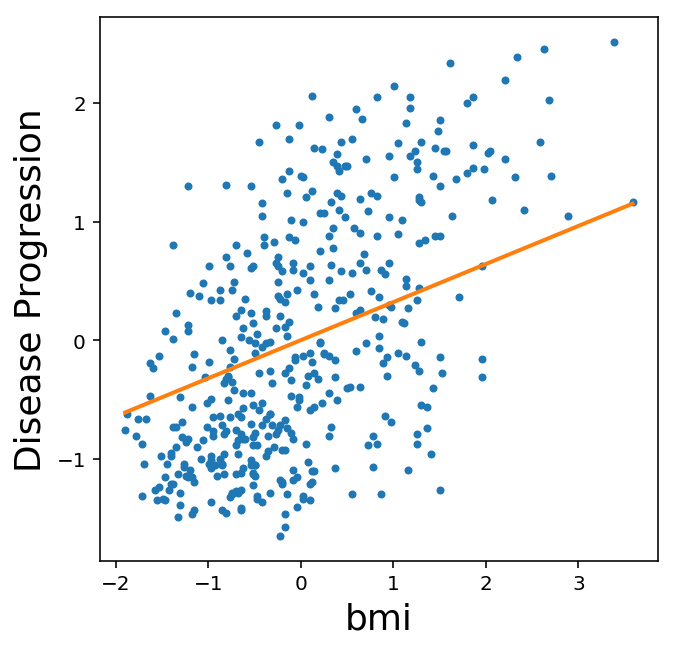

In [162]:
bmi = X[:,2]
beta_bmi = olsmodel.coef_[2]

plt.plot(bmi, y, '.')
plt.xlabel('bmi')
plt.ylabel('Disease Progression')

xfit = np.linspace(bmi.min(), bmi.max(), 100)
yfit = beta_bmi * xfit
plt.plot(xfit, yfit, lw=2);

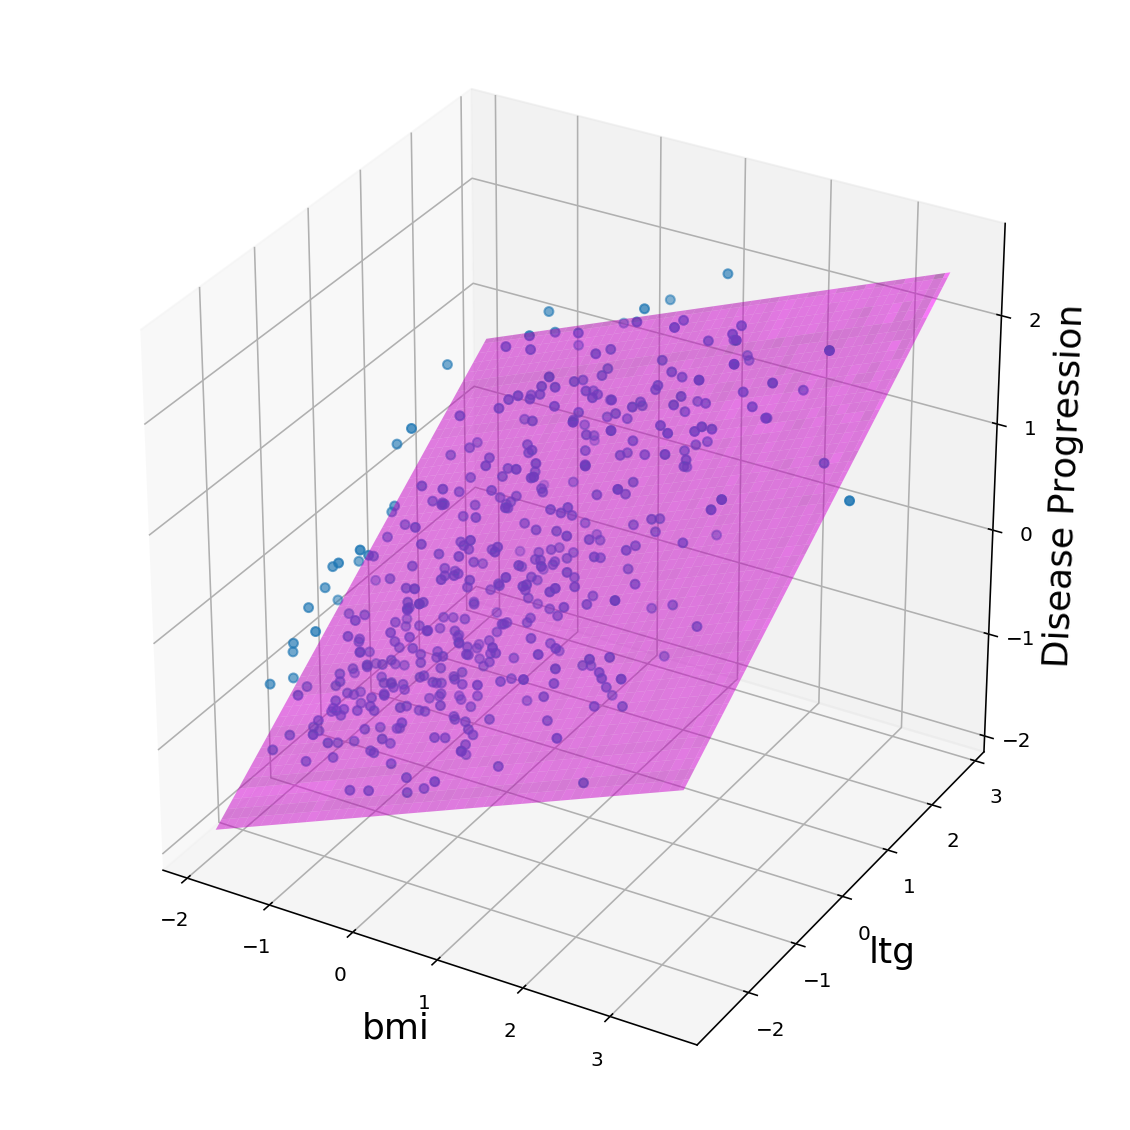

In [163]:
from mpl_toolkits import mplot3d

bmi = X[:,2]
ltg = X[:,8]

beta_bmi = olsmodel.coef_[2]
beta_ltg = olsmodel.coef_[8]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(bmi, ltg, y)
ax.set_xlabel('bmi')
ax.set_ylabel('ltg')
ax.set_zlabel('Disease Progression')

bmirange = np.linspace(bmi.min(), bmi.max(), 100)
ltgrange = np.linspace(ltg.min(), ltg.max(), 100)
xx, yy = np.meshgrid(bmirange, ltgrange)
zz = xx * beta_bmi + yy * beta_ltg
ax.plot_surface(xx, yy, zz, alpha=0.5, color='magenta');

plt.tight_layout();

---
## Correlations between features?

### OLS assumes all features are independent of each other.

### What does correlations between features do to the model fit?

## <font color=blue>Learning Objectives:</font>
1. You will appreciate how correlations between features can affect the model fit.
2. You will learn one method for dealing with these correlations (i.e. leave one of the correlated features out).

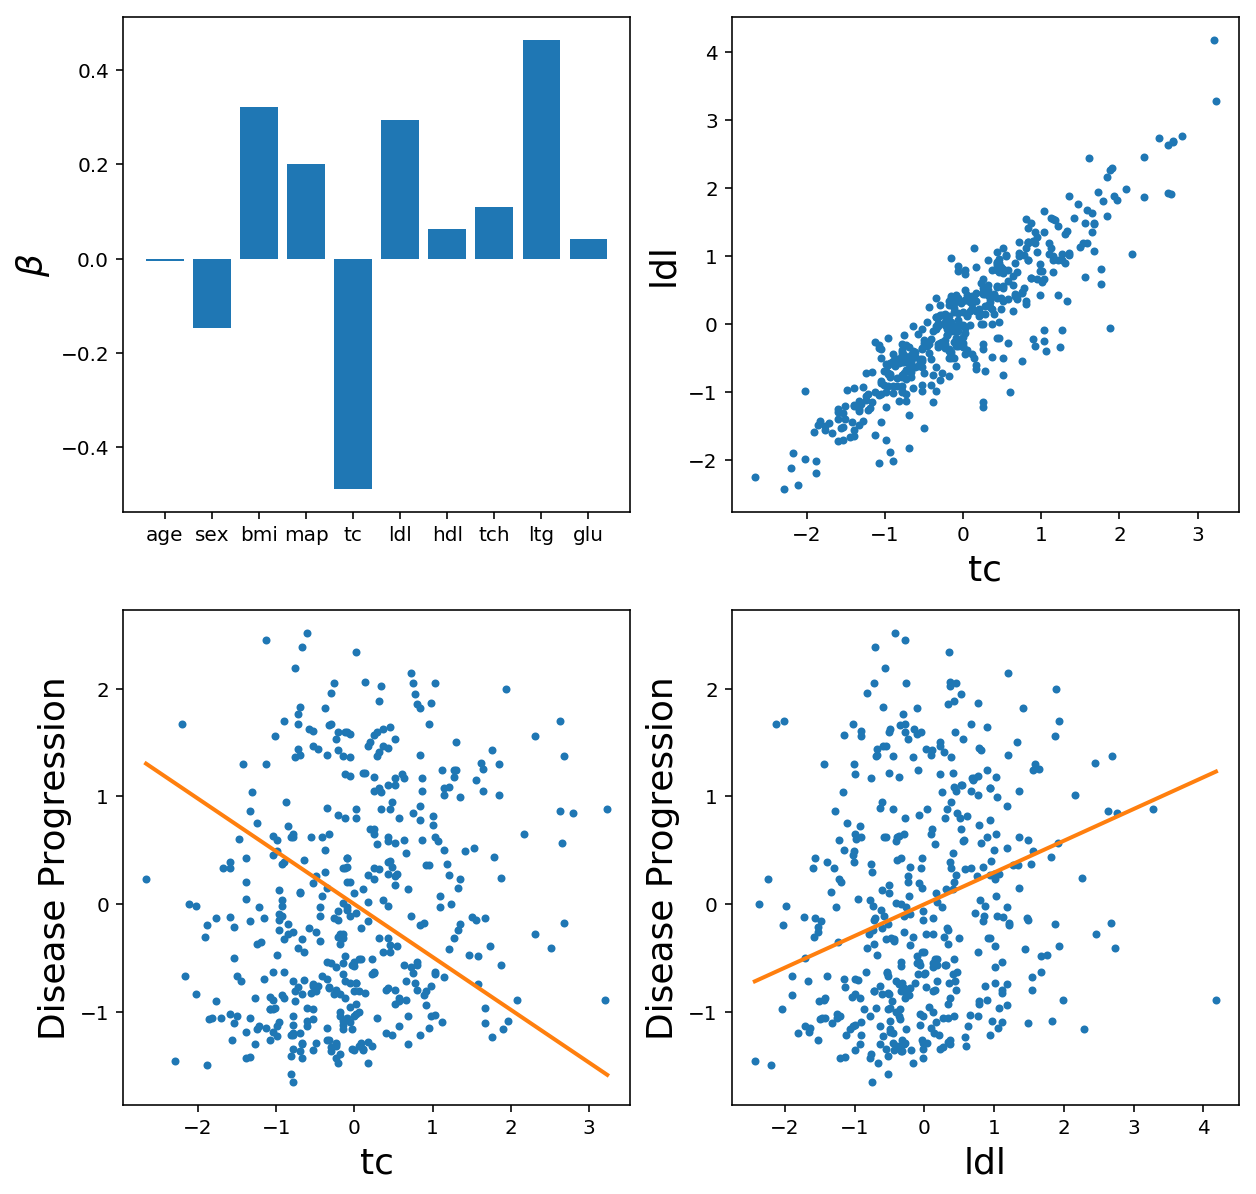

In [167]:
plt.figure(figsize=(10, 10))
tc = X[:,4]
ldl = X[:,5]
beta_tc = olsmodel.coef_[4]
beta_ldl = olsmodel.coef_[5]

plt.subplot(221)
n = len(olsmodel.coef_)
plt.bar(range(n), olsmodel.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$')

plt.subplot(222)
plt.plot(tc, ldl, '.')
plt.xlabel('tc')
plt.ylabel('ldl')

plt.subplot(223)
plt.plot(tc, y, '.')
plt.xlabel('tc')
plt.ylabel('Disease Progression')
xfit = np.linspace(tc.min(), tc.max(), 100)
yfit = beta_tc * xfit
plt.plot(xfit, yfit, lw=2)

plt.subplot(224)
plt.plot(ldl, y, '.')
plt.xlabel('ldl')
plt.ylabel('Disease Progression')
xfit = np.linspace(ldl.min(), ldl.max(), 100)
yfit = beta_ldl * xfit
plt.plot(xfit, yfit, lw=2);

---
## Refit on all features except ldl

In [47]:
features

['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

In [48]:
ldl_index = features.index('ldl')
ldl_index

5

In [50]:
cols = list(range(len(features)))
cols.remove(ldl_index)
cols

[0, 1, 2, 3, 4, 6, 7, 8, 9]

In [54]:
X_no_ldl = X[:,cols]

import copy
features_no_ldl = copy.copy(features)
features_no_ldl.remove('ldl')

X_no_ldl.shape, features_no_ldl

((442, 9), ['age', 'sex', 'bmi', 'map', 'tc', 'hdl', 'tch', 'ltg', 'glu'])

In [55]:
olsmodel_no_ldl = LinearRegression(fit_intercept=False)
olsmodel_no_ldl.fit(X_no_ldl, y);

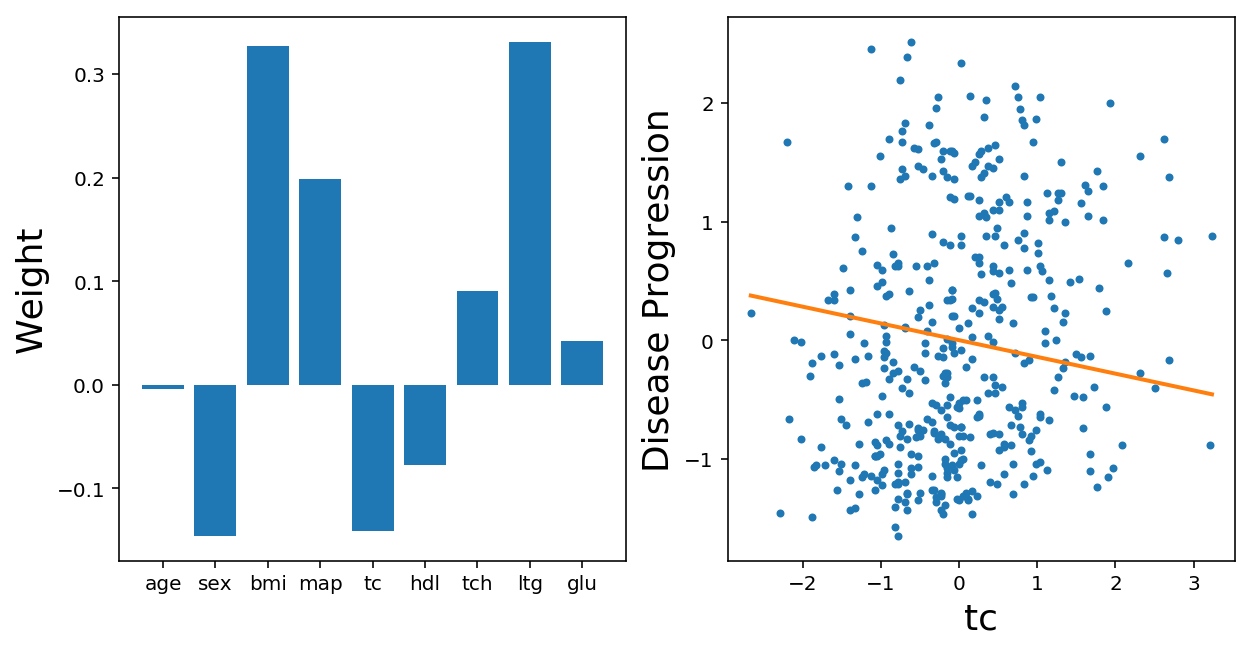

In [60]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
n = len(olsmodel_no_ldl.coef_)
plt.bar(range(n), olsmodel_no_ldl.coef_)
plt.xticks(range(n), features_no_ldl)
plt.ylabel('Weight')

plt.subplot(122)
tc = X_no_ldl[:,4]
beta_tc = olsmodel_no_ldl.coef_[4]
plt.plot(tc, y, '.')
plt.xlabel('tc')
plt.ylabel('Disease Progression')
xfit = np.linspace(tc.min(), tc.max(), 100)
yfit = beta_tc * xfit
plt.plot(xfit, yfit, lw=2)

---
## Refit on all features except tc

## <font color=red>Exercises</font>

1. Refit on all features except tc.

In [ ]:
X_no_tc = ...

features_no_tc = ...

olsmodel_no_tc = ...

olsmodel_no_tc.fit(...);

In [ ]:
n = len(olsmodel_no_tc.coef_)
plt.bar(range(n), olsmodel_no_tc.coef_)
plt.xticks(range(n), features_no_tc)
plt.ylabel('Weight')

---
## Use stasmodels to to fit data and get confidence intervals on each $\beta$.

## <font color=blue>Learning Objectives:</font>
1. You will appreciate that visualizing parameter confidence intervals can help to interpret the model and decide which features are really important.

In [169]:
import statsmodels.api as sm

model = sm.OLS(y, X_no_ldl)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.516
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              51.20
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    9.61e-63
Time:                        10:26:29   Log-Likelihood:                         -467.01
No. Observations:                 442   AIC:                                      952.0
Df Residuals:                     433   BIC:                                      988.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0040      0.037     -0.109      0.913      -0.076       0.068
x2            -0.1459      0.038     -3.861      0.000      -0.220      -0.072
x3             0.3265      0.041      7.981      0.000       0.246       0.407
x4             0.1990      0.040      4.927      0.000       0.120       0.278
x5            -0.1412      0.070     -2.007      0.045      -0.279      -0.003
x6            -0.0774      0.086     -0.904      0.367      -0.246       0.091
x7             0.0903      0.099      0.914      0.361      -0.104       0.284
x8             0.3311      0.048      6.845      0.000       0.236       0.426
x9             0.0427      0.041      1.048      0.295      -0.037       0.123
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.535
Skew:                           0.041   Prob(JB):                        0.464
Kurtosis:                       2.723   Cond. No.                         7.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# weights
beta = results.params
beta

array([-0.00401968, -0.14588077,  0.32652102,  0.19904229, -0.14116968,
       -0.07743321,  0.09027239,  0.33114046,  0.04268939])

In [171]:
# confidence interval
ci = results.conf_int(alpha=0.05)
ci

array([[-0.07649212,  0.06845276],
       [-0.22013808, -0.07162347],
       [ 0.24610569,  0.40693635],
       [ 0.11964168,  0.2784429 ],
       [-0.27939614, -0.00294322],
       [-0.2458541 ,  0.09098768],
       [-0.10393337,  0.28447814],
       [ 0.23605427,  0.42622665],
       [-0.03740516,  0.12278393]])

### Plot $\beta$ with errorbars for the confidence interval.

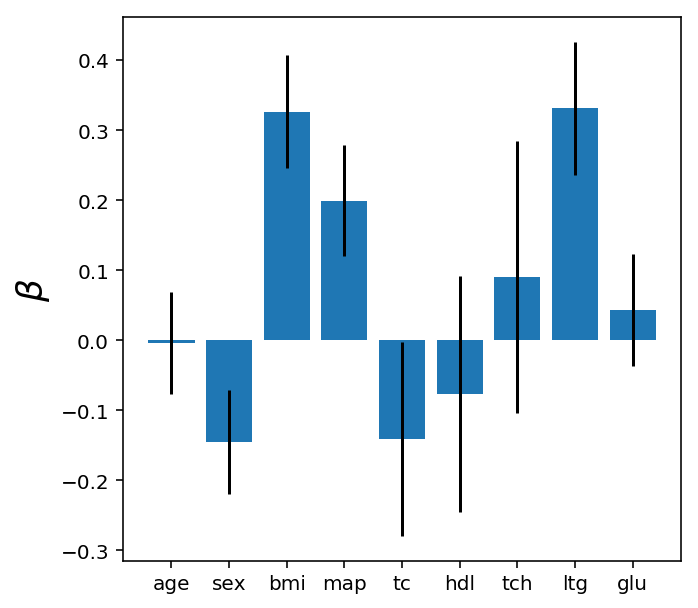

In [172]:
n = len(results.params)
below = beta - ci[:,0]
above = ci[:,1] - beta

plt.bar(range(n), results.params, yerr=[below, above])
plt.xticks(range(n), features_no_ldl)
plt.ylabel(r'$\beta$');

## <font color=red>Exercises</font>

1. Refit using only those features you think matter.